예측 원리 : 
루트노트(상단)부터 시작하여 각 노트의 질문에 따라 가지를 타고 내려가서 최종 리프노드(하단)에 도달하여 예측값을 얻는 과정.

클래스 확률 추정 : 
특정 데이터가 각 클래스에 속할 확률을 어떻게 계산하는지 설명.


규제 하이퍼 파라메터 : 
훈련데이터에 너무 과하게 맞춰지는 과대적합 or 과적합 (overfiting) 을 막기 위해 파라메터들을 조정.

회귀 : 
특정 수치를 예측하는 회구 문제에 적용 가능함. -> 불순도 대신 MSE 사용
- 불안정성 : 작은 변화에도 민감하게 반응하여 트리구조가 완전히 달라질 수 있음 -> 랜덤포레스트 등장의 배경

노드 분할의 기준 : 지니계수(Gini Imourity)
'''
한 그룹(노드)에 얼마나 다른 데이터들이 섞여 있는가? 를 나타내는 지표
0 : 완전 순수 : 한 그룹에 하나의 클래스만 있음 : (ex) 상자에 파란색 공만 있음

스무고개를 하면서 왼쪽 오른쪽 분할 해 가면서 찾아감.

질문을 통해서 데이터를 나눌때 다음 그룹들의 지니 불순도가 최대한 낮아지도록 하는 질문(지표)
'''


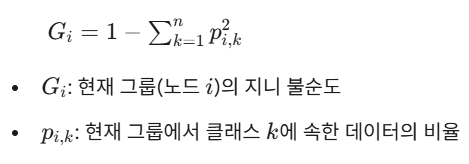

In [ ]:
# 노트에 50개의 데이터가 붓꽃 A 40 B 10
# A의 비율 (Pa) = 40 / 50 = 0.8
# B의 비율 (Pb) = 10 / 50 = 0.2
# 지니의 불순도 =>  1 - (0.8^2 + 0.2^2) = 0.64 + 0.04 = 0.68   /   1 - 0.86 = 0.32

# 결정트리 CART 알고리즘
# 1. 모든 가능한 질문 생성 : 하나의 특성(ex 꽃잎의 길이) 가능한 모든 임계값(ex 2.25cm 1.5cm) 조합해서 질문
# 2. 불순도 감소량 계산 : 각 질문으로 데이터를 두개로 나눌때 분할 전 부모노드의 불순도 - 두 자식의 불순도 가중 평균  /  이 값이 클수록 더 좋은 질문임.! ********


In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 트리 종류가 많음
iris = load_iris(as_frame=True)
X = iris.data.iloc[:,[2,3]]
y = iris.target
tree = DecisionTreeClassifier()
tree.fit(X,y)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


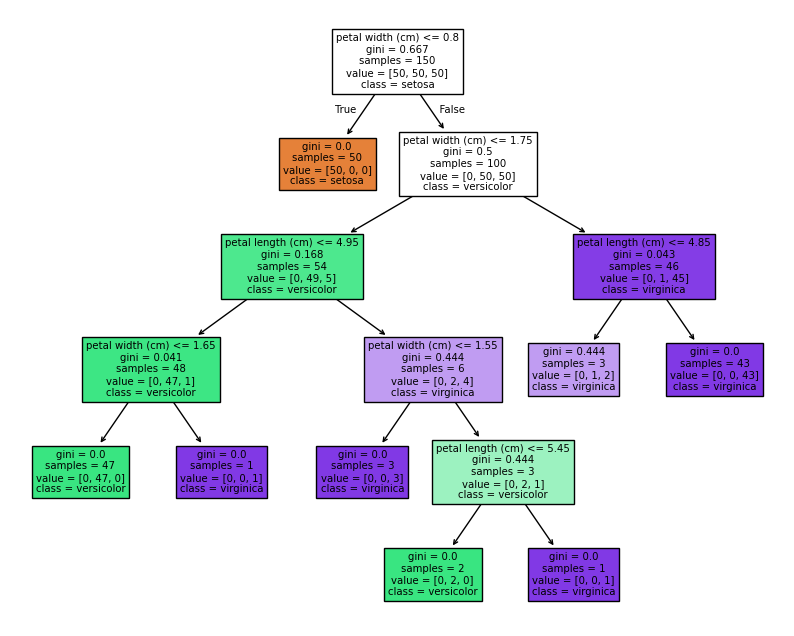

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree, feature_names=X.columns,class_names=iris.target_names, filled=True)
plt.show()

In [10]:

# tree 학습 후 가장 중요한 피처들의 정보를 출력 
tree.feature_importances_ , tree.feature_names_in_# 2번째가 중요함

(array([0.06492158, 0.93507842]),
 array(['petal length (cm)', 'petal width (cm)'], dtype=object))

In [13]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
y.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# 전체 영역에 대한 예측

import numpy as np
np.meshgrid(np.linspace(0,7.2,100), np.linspace(0,3,100))

(array([[0.        , 0.07272727, 0.14545455, ..., 7.05454545, 7.12727273,
         7.2       ],
        [0.        , 0.07272727, 0.14545455, ..., 7.05454545, 7.12727273,
         7.2       ],
        [0.        , 0.07272727, 0.14545455, ..., 7.05454545, 7.12727273,
         7.2       ],
        ...,
        [0.        , 0.07272727, 0.14545455, ..., 7.05454545, 7.12727273,
         7.2       ],
        [0.        , 0.07272727, 0.14545455, ..., 7.05454545, 7.12727273,
         7.2       ],
        [0.        , 0.07272727, 0.14545455, ..., 7.05454545, 7.12727273,
         7.2       ]], shape=(100, 100)),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03030303, 0.03030303, 0.03030303, ..., 0.03030303, 0.03030303,
         0.03030303],
        [0.06060606, 0.06060606, 0.06060606, ..., 0.06060606, 0.06060606,
         0.06060606],
        ...,
        [2.93939394, 2.93939394, 2.93939394, ..., 2.93939394, 2.93939394,
         2.93939

In [21]:

import numpy as np
legths , widths = np.meshgrid(np.linspace(0,7.2,100), np.linspace(0,3,100))

np.c_[legths.ravel(),widths.ravel()] # 세워서 펴줌




array([[0.        , 0.        ],
       [0.07272727, 0.        ],
       [0.14545455, 0.        ],
       ...,
       [7.05454545, 3.        ],
       [7.12727273, 3.        ],
       [7.2       , 3.        ]], shape=(10000, 2))

c:\Users\playdata\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


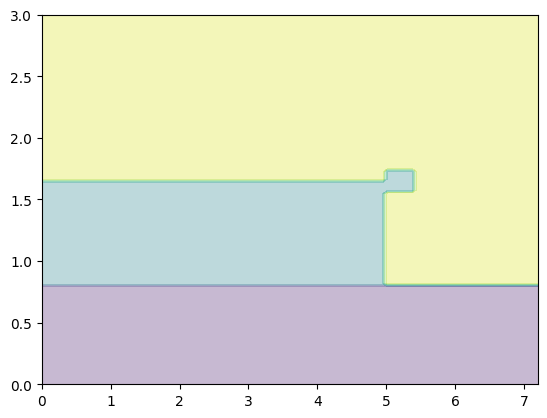

In [25]:

import numpy as np
legths , widths = np.meshgrid(np.linspace(0,7.2,100), np.linspace(0,3,100))

x_iris_all = np.c_[legths.ravel(),widths.ravel()]

y_pred = tree.predict(x_iris_all).reshape(legths.shape) # 데이터는 맞지만 경고를 줌
plt.contourf(legths , widths , y_pred, alpha = 0.3)

In [24]:
legths.shape

(100, 100)

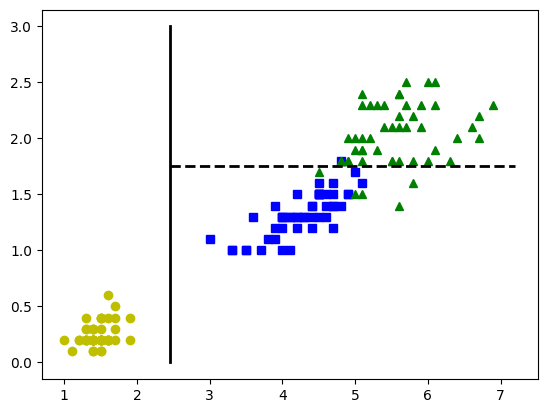

In [27]:
# 실제 데이터 포인트 그리기
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X.to_numpy()[:, 0][y == idx], X.to_numpy()[:, 1][y == idx],
             style, label=f"Iris {name}")

# 더 깊은 트리를 학습시켜 실제 결정선(분기 조건) 가져오기
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

# 결정선 그리기
plt.plot([th0, th0], [0, 3], "k-", linewidth=2) # 첫 번째 분기 (실선)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2) # 두 번째 분기 (파선)
# ... (이후 분기들)

In [28]:
# Tree - 지니계수 지니불순도 , 자식노드가 순수상태가 되는 방향으로 계속 Tree를 확장
# 스케일링 필요없음
# 중요 피처에 대한 정보
# 과적합이 일어나기 쉬운 구조


In [32]:
# 성능 측정 위한 데이터 분할
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data
y = iris.target


# 데이터 분할
x_train , x_test , y_train , y_test = train_test_split(X,y,stratify=y , test_size=0.2, random_state=42)

# 학습
tree = DecisionTreeClassifier(max_depth=3) # 3차원
tree.fit(x_train,y_train)

# 예측
y_hat = tree.predict(x_test)

# 리포트
print(classification_report(y_test,y_hat))

# 중요 feature
tree.feature_importances_ , tree.feature_names_in_


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



(array([0.57907728, 0.42092272]),
 array(['petal length (cm)', 'petal width (cm)'], dtype=object))

In [34]:
DecisionTreeClassifier(criterion='gini' , max_depth=1)
DecisionTreeClassifier(criterion='gini' , max_depth=2)
DecisionTreeClassifier(criterion='gini' , max_depth=3)
DecisionTreeClassifier(criterion='gini' , max_depth=4)
DecisionTreeClassifier(criterion='gini' , max_depth=5)

DecisionTreeClassifier(criterion='entropy' , max_depth=1)
DecisionTreeClassifier(criterion='entropy' , max_depth=2)
DecisionTreeClassifier(criterion='entropy' , max_depth=3)
DecisionTreeClassifier(criterion='entropy' , max_depth=4)
DecisionTreeClassifier(criterion='entropy' , max_depth=5)
# 이렇게 일일히 할 필요 없이  GridSearchCV 를 사용해주면 돼!

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
# 하이퍼 파라메터 튜닝

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'max_depth' : range(1,10)
}


grid_SearchCV = GridSearchCV(tree, param_grid=param_grid , cv=3 , verbose=1 , n_jobs=-1)
grid_SearchCV.fit(x_train,y_train)



Fitting 3 folds for each of 27 candidates, totalling 81 fits


,estimator,DecisionTreeC...r(max_depth=3)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': range(1, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [39]:
# 베스트한 조합이 뭐냐
print(grid_SearchCV.best_params_)
print(grid_SearchCV.best_score_)
print(grid_SearchCV.best_estimator_)

{'criterion': 'gini', 'max_depth': 3}
0.9583333333333334
DecisionTreeClassifier(max_depth=3)
